# Threshold-based Binary Classifiers

In this notebook, I'm going to implement three different threshold-based binary classifiers on a dataset which consists of two classes of images:

* Images of a landscape in day-time
* Images of a landscape in night-time

There will be three binary classifiers in this notebook, all of them using the same approach (using threshold) to classify the images. The difference between these three comes with the type of the images that used to calculate the average of each class. As said before, there are three type of image.

- The plain RGB image which to calculate the average it uses all three channels of RGB
- The grayscaled version of RGB image
- The third approach first converts RGB images to HSV and then uses **V** channel to compute the average

**Note**: before doing anything, unzip the `day_night_images.rar` file.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

import helpers

In [2]:
# Image data directories
image_dir_training = "day_night_images/training/"
image_dir_test = "day_night_images/test/"

In [3]:
# Load all images in training folder
TRAIN_IMAGE_LIST = helpers.load_dataset(image_dir_training)
# Standardize all training images
TRAIN_STANDARDIZED_LIST = helpers.standardize(TRAIN_IMAGE_LIST)

# Load all images in testing folder
TEST_IMAGE_LIST = helpers.load_dataset(image_dir_test)
# Standardize all testing images
TEST_STANDARDIZED_LIST = helpers.standardize(TEST_IMAGE_LIST)

Shape: (600, 1100, 3)
Label [1 = day, 0 = night]: 1


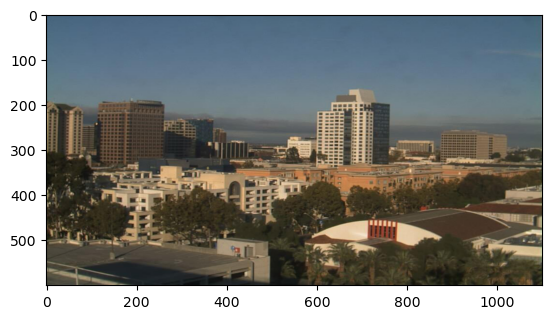

In [4]:
# Display a standardized image and its label

# Select an image by index
image_num = 4
selected_image = TRAIN_STANDARDIZED_LIST[image_num][0]
selected_label = TRAIN_STANDARDIZED_LIST[image_num][1]

# Display image and data about it
plt.imshow(selected_image)
print("Shape: "+str(selected_image.shape))
print("Label [1 = day, 0 = night]: " + str(selected_label))

In [5]:
def estimate_avg_brightness(images_list, avg_calculator):
    '''This function will calculate the average brightness of each of the two image classes (day/night), and returns two values''' 
    days_avg = 0
    days_count = 0
    nights_avg = 0
    nights_count = 0
    for rgb_img in images_list:
        if rgb_img[1] == 1:     # day
            days_avg += avg_calculator(rgb_img[0])
            days_count += 1
            
        else:                   # night
            nights_avg += avg_calculator(rgb_img[0])
            nights_count += 1
    
    days_avg /= days_count
    nights_avg /= nights_count
    
    return days_avg, nights_avg

In [6]:
def predictor(threshold, images_list, avg_calculator):
    '''Given threshold, this function predicts the label for each image given in image_list, and return a list of predicted labels'''
    preds = []
    for rgb_img in images_list:
        if avg_calculator(rgb_img[0]) >= threshold:     # day
            preds.append(1)
            
        else:                                          # night
            preds.append(0)
    return preds

In [7]:
def threshold_esimator(day_average, night_average):
    '''Calculates the average of two number to use it as a threshold for classifying the images'''
    threshold = (day_average + night_average) / 2
    
    return threshold

In [8]:
def accuracy(images_list, predictions):
    labels = []
    for img in images_list:
        labels.append(img[1])
        
    accuracy = np.mean(np.array(labels) == np.array(predictions))
    return accuracy

---

## 1. RGB Approach

In [9]:
def rgb_avg_brightness(rgb_image):
    '''This function calculates the mean of all three channels of RGB image'''
    
    avg = np.mean(rgb_image)
    
    return avg

In [10]:
# Train the medel using training data (calculate the average value on all three RGB channels of each image in training folder)
rgb_threshold = threshold_esimator(*estimate_avg_brightness(TRAIN_STANDARDIZED_LIST, rgb_avg_brightness))

print(f'The estimated threshold on RGB approach is {rgb_threshold}')

The estimated threshold on RGB approach is 89.0161696064815


In [11]:
# Make predictions on testing data using calculated thresholds
preds = predictor(rgb_threshold, TEST_STANDARDIZED_LIST, rgb_avg_brightness)

# Calculate the accuracy by comparing predicted labels vs real labels of testing data
rgb_acc = accuracy(TEST_STANDARDIZED_LIST, preds)

print(f'The accuracy of classifier on testing data is {rgb_acc*100}%')

The accuracy of classifier on testing data is 94.375%


---

## 2. Grayscale Approach

In [12]:
def grayscale_avg_brightness(rgb_image):
    '''This function calculates the mean of values of grayscaled version of images'''
    gray = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2GRAY)
    
    avg = np.mean(gray)
    
    return avg

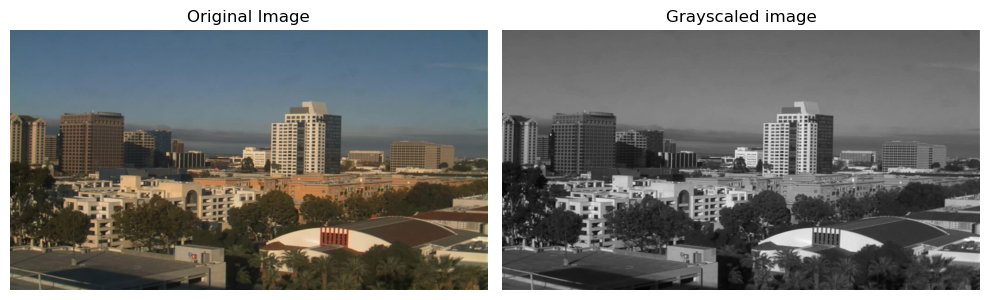

In [13]:
# Display a standardized image and its label

# Select an image by index
image_num = 4
rgb_image = TRAIN_STANDARDIZED_LIST[image_num][0]

# Convert the image scale from RGB to grayscale
grayscale_image = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2GRAY)

# Plot both the original and grayscaled images
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 20))

ax0.imshow(rgb_image)
ax0.set_title('Original Image')
ax0.axis('off')

ax1.imshow(grayscale_image, cmap='gray')
ax1.set_title('Grayscaled image')
ax1.axis('off')

plt.tight_layout()

In [14]:
# Train the medel using training data (calculate the average value on grayscaled version of each image)
grayscale_threshold = threshold_esimator(*estimate_avg_brightness(TRAIN_STANDARDIZED_LIST, grayscale_avg_brightness))

print(f'The estimated threshold on RGB approach is {grayscale_threshold}')

The estimated threshold on RGB approach is 89.83721585858585


In [15]:
# Make predictions on testing data using calculated thresholds
preds = predictor(grayscale_threshold, TEST_STANDARDIZED_LIST, grayscale_avg_brightness)

# Calculate the accuracy by comparing predicted labels vs real labels of testing data
grayscale_acc = accuracy(TEST_STANDARDIZED_LIST, preds)

print(f'The accuracy of classifier on testing data is {grayscale_acc*100}%')

The accuracy of classifier on testing data is 96.875%


---

## 3. HSV Approach

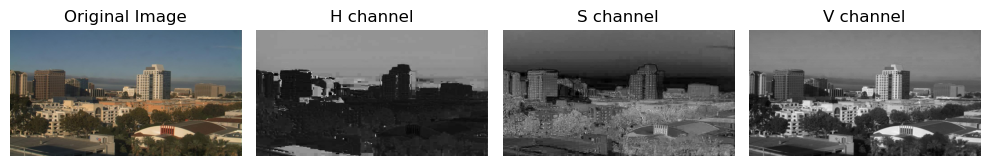

In [16]:
# Select an image by index
image_num = 4
rgb_image = TRAIN_STANDARDIZED_LIST[image_num][0]

# Convert the image scale from RGB to HSV
hsv_image = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)

# Plot the each channel of converted image separately
fig, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, figsize=(10, 20))

ax0.imshow(rgb_image)
ax0.set_title('Original Image')
ax0.axis('off')

ax1.imshow(hsv_image[:,:,0], cmap='gray')
ax1.set_title('H channel')
ax1.axis('off')

ax2.imshow(hsv_image[:,:,1], cmap='gray')
ax2.set_title('S channel')
ax2.axis('off')

ax3.imshow(hsv_image[:,:,2], cmap='gray')
ax3.set_title('V channel')
ax3.axis('off')

plt.tight_layout()

In [17]:
def hsv_avg_brightness(rgb_image):
    '''This function calculates the mean of values of 'V' channel of a HSV image'''
    hsv = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)
    
    avg = np.mean(hsv[:, :, 2])
    
    return avg

In [18]:
# Train the medel using training data (calculate the average value on V channel of each image in training folder)
hsv_threshold = threshold_esimator(*estimate_avg_brightness(TRAIN_STANDARDIZED_LIST, hsv_avg_brightness))

print(f'The estimated threshold on RGB -> HSV approach is {hsv_threshold}')

The estimated threshold on RGB -> HSV approach is 103.28939957702019


In [19]:
# Make predictions on testing data using calculated thresholds
preds = predictor(hsv_threshold, TEST_STANDARDIZED_LIST, hsv_avg_brightness)

# Calculate the accuracy by comparing predicted labels vs real labels of testing data
hsv_acc = accuracy(TEST_STANDARDIZED_LIST, preds)

print(f'The accuracy of classifier on testing data is {hsv_acc*100}%')

The accuracy of classifier on testing data is 92.5%


---
---

**As we've seen, amont these three apporachs, the grayscale has the best accuracy:**

1. **grayscale approach: 96.875%**
2. **RGB approach: 94.375%**
3. **HSV approach: 92.5%**